In [10]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [12]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [17]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
market_data_scaled = scaler.fit_transform(market_data_df)

# Convert the scaled data back into a DataFrame
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns=market_data_df.columns, index=market_data_df.index)

# Display sample data
market_data_scaled_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [19]:
# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(market_data_scaled, columns=market_data_df.columns)

# Copy the crypto names from the original data
scaled_data_df['coin_id'] = market_data_df.index

# Set the coinid column as index
scaled_data_df = scaled_data_df.set_index('coin_id')

# Display sample data
scaled_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [22]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop: 
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k)
    # 2. Fit the model to the data using the scaled DataFrame
    model.fit(scaled_data_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,66.040738
5,6,52.888518
6,7,43.939301
7,8,37.384252
8,9,32.124835
9,10,28.222899


<Axes: title={'center': 'Elbow Curve'}, xlabel='Number of Clusters (k)', ylabel='Inertia'>

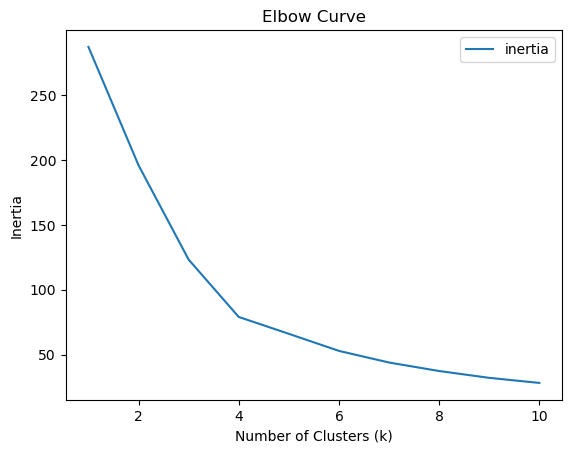

In [23]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x="k", y="inertia", kind="line", title="Elbow Curve", xlabel="Number of Clusters (k)", ylabel="Inertia")

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Based on the given data, the best value for `k` can be determined by looking at the inertia values, which represent the within-cluster sum of squares. The goal is to find the "elbow" point in the data, where the inertia starts to decrease at a slower rate. In this case, there is a significant drop in inertia from `k = 1` (287.00) to `k = 2` (198.57), and again to `k = 3` (123.19). After `k = 4` (79.02), the rate of decrease in inertia slows down, indicating a less significant improvement in clustering quality. Thus, the elbow point appears to be at `k = 4`, making it the best value for `k`. This value balances the trade-off between model simplicity and the accuracy of clustering, ensuring efficient and interpretable clusters.


### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [26]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k)

In [27]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_data_df)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [28]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans_model.predict(scaled_data_df)

# View the resulting array of cluster values.
print(predicted_clusters)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [29]:
# Create a copy of the DataFrame
clustered_df = scaled_data_df.copy()

In [30]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df['Cluster'] = predicted_clusters

# Display sample data
clustered_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


C:\Users\HP\AppData\Local\Temp\ipykernel_16856\3716058867.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  scatter_plot.figure.show()


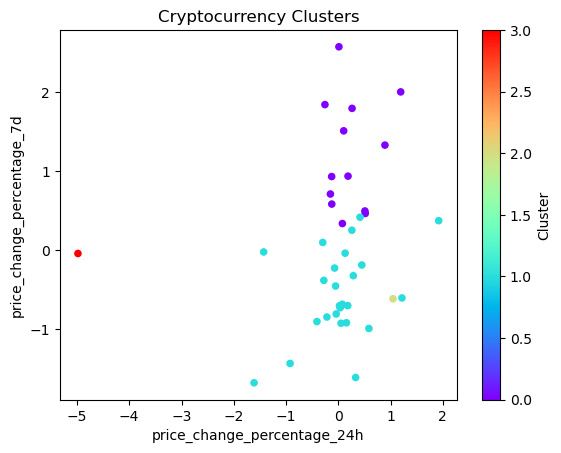

In [31]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scatter_plot = clustered_df.plot.scatter(x="price_change_percentage_24h", 
                                         y="price_change_percentage_7d", 
                                         c="Cluster", 
                                         colormap="rainbow", 
                                         title="Cryptocurrency Clusters")

# Display the plot
scatter_plot.figure.show()

### Optimize Clusters with Principal Component Analysis.

In [33]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [34]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components
pca_data = pca.fit_transform(scaled_data_df)

# Create a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"], index=scaled_data_df.index)

# View the first five rows of the DataFrame
display(pca_df.head())



,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [35]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
display("Explained Variance Ratio:", explained_variance)

'Explained Variance Ratio:'

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Using the PCA model with three components, we reduced the original scaled data to three principal components. The explained variance ratio tells us how much information is captured by each principal component. The first principal component (PC1) captures approximately 37.20% of the variance, the second principal component (PC2) captures about 34.70%, and the third principal component (PC3) captures around 17.60%. This means that together, these three components account for about 89.30% of the total variance in the original data, effectively summarizing the dataset with minimal loss of information.

In [37]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df.index

# Set the coinid column as index
pca_df = pca_df.set_index('coin_id')

# Display sample data
pca_df.head(10)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [39]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k)
    # 2. Fit the model to the data using PCA DataFrame
    model.fit(pca_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.720626
6,7,21.182776
7,8,17.091637
8,9,13.971221
9,10,10.836312


<Axes: title={'center': 'Elbow Curve'}, xlabel='Number of Clusters (k)', ylabel='Inertia'>

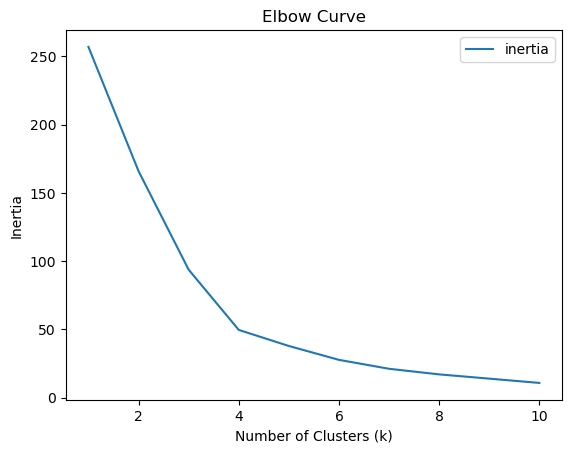

In [41]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x="k", y="inertia", kind="line", title="Elbow Curve", xlabel="Number of Clusters (k)", ylabel="Inertia")

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA data can be identified by analyzing the Elbow curve, which plots the inertia values against different numbers of clusters (k). The optimal k is typically the point where the curve starts to flatten, indicating diminishing returns in the reduction of inertia as more clusters are added. In this case, the Elbow curve suggests that the best value for k is 4. This is the point where the reduction in inertia slows down significantly, indicating that four clusters provide a good balance between the complexity of the model and the amount of variance it explains.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, the best value for k when using the PCA data differs from the best k value found using the original data. When analyzing the original data, the optimal k value might have been different due to the higher dimensionality and potentially more noise in the data. PCA reduces the dimensionality of the data and captures the most important variance in fewer dimensions, which can lead to a different clustering structure. By using PCA, the clustering process focuses on the most significant features, which can result in a different optimal number of clusters compared to using the raw, high-dimensional data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [46]:
# Initialize the K-Means model using the best value for k
best_k = 4 
kmeans_model = KMeans(n_clusters=best_k)

In [51]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [57]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans_model.predict(pca_df)

# Print the resulting array of cluster values.
print(predicted_clusters)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [58]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_pca_df['Cluster'] = predicted_clusters


# Display sample data
clustered_pca_df.head(10)
clustered_pca_df.tail(10)

,PC1,PC2,PC3,Cluster
coin_id,,,,
ethereum-classic,-0.579924,-0.356334,-0.114942,0
ethlend,8.089018,-3.896891,2.301382,2
maker,-0.389045,0.165041,0.379414,3
havven,0.865762,-2.261882,0.275583,0
omisego,0.111675,0.428316,-1.205398,0
celsius-degree-token,4.792395,6.767679,-1.986985,1
ontology,-0.632355,-2.108117,-0.652227,0
ftx-token,-0.593142,0.021485,0.209911,0
true-usd,-0.458131,-0.135734,-0.635284,0


C:\Users\HP\AppData\Local\Temp\ipykernel_16856\1827843799.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  scatter_plot.figure.show()


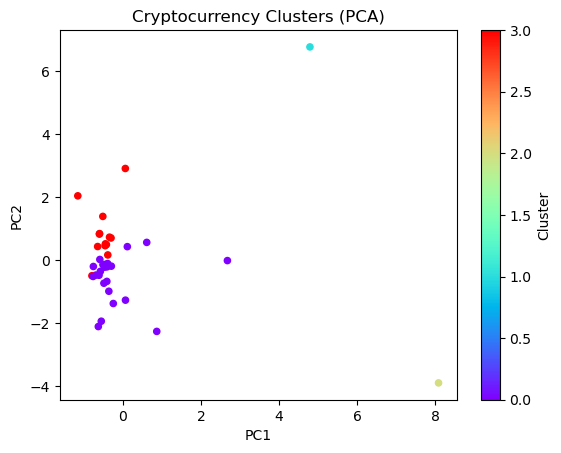

In [59]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
scatter_plot = clustered_pca_df.plot.scatter(x="PC1", y="PC2", c="Cluster", colormap="rainbow", title="Cryptocurrency Clusters (PCA)")

# Display the plot
scatter_plot.figure.show()

### Determine the Weights of Each Feature on each Principal Component

In [83]:
# Standardize the data
scaler = StandardScaler()
market_data_scaled = scaler.fit_transform(market_data_df)

# Apply PCA
pca = PCA(n_components=3)
pca.fit(market_data_scaled)

# Create a DataFrame using the pca.components_ as your rows
loadings_df = pd.DataFrame(pca.components_, columns=market_data_df.columns, index=['PC1', 'PC2', 'PC3'])

# Display the DataFrame to see the weights of each feature on each principal component
print("PCA Component Loadings:")
print(loadings_df)

# Optionally, to identify the strongest positive or negative influence on each component:
# Identify the feature with the highest absolute weight on each component
strongest_features = loadings_df.abs().idxmax()

# Display the strongest features for each principal component
print("\nStrongest Features for Each Principal Component:")
print(strongest_features)

PCA Component Loadings:
     price_change_percentage_24h  price_change_percentage_7d  \
PC1                    -0.416728                   -0.102432   
PC2                     0.358162                    0.227432   
PC3                    -0.218795                    0.787670   

     price_change_percentage_14d  price_change_percentage_30d  \
PC1                    -0.009162                     0.191523   
PC2                     0.540415                     0.562182   
PC3                     0.349534                    -0.181744   

     price_change_percentage_60d  price_change_percentage_200d  \
PC1                     0.320365                      0.594468   
PC2                     0.434040                      0.027735   
PC3                    -0.361377                      0.039733   

     price_change_percentage_1y  
PC1                    0.568379  
PC2                   -0.150789  
PC3                    0.210541  

Strongest Features for Each Principal Component:
price_c

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
## PCA Component Analysis

**PCA Component Loadings:**

|                           | 24h Change | 7d Change | 14d Change | 30d Change | 60d Change | 200d Change | 1y Change |
|---------------------------|------------|-----------|------------|------------|------------|-------------|-----------|
| **PC1**                   | -0.416728  | -0.102432 | -0.009162  |  0.191523  |  0.320365  |   0.594468  |  0.568379 |
| **PC2**                   |  0.358162  |  0.227432 |  0.540415  |  0.562182  |  0.434040  |   0.027735  | -0.150789 |
| **PC3**                   | -0.218795  |  0.787670 |  0.349534  | -0.181744  | -0.361377  |   0.039733  |  0.210541 |

### Strongest Features for Each Principal Component

- **PC1 (Principal Component 1):**
  - **Strongest Positive Influence:** The features `price_change_percentage_200d` (200-day price change percentage) and `price_change_percentage_1y` (1-year price change percentage) have the strongest positive influences.
  - **Strongest Negative Influence:** The feature `price_change_percentage_24h` (24-hour price change percentage) has the strongest negative influence.
  
- **PC2 (Principal Component 2):**
  - **Strongest Positive Influence:** The features `price_change_percentage_30d` (30-day price change percentage) and `price_change_percentage_14d` (14-day price change percentage) have the strongest positive influences.
  - **Strongest Negative Influence:** The feature `price_change_percentage_1y` (1-year price change percentage) has a negative influence.

- **PC3 (Principal Component 3):**
  - **Strongest Positive Influence:** The feature `price_change_percentage_7d` (7-day price change percentage) has the strongest positive influence.
  - **Strongest Negative Influence:** The feature `price_change_percentage_60d` (60-day price change percentage) has the strongest negative influence.

This analysis indicates how different time frames of price changes impact each principal component:
- **PC1** focuses on the influence of longer-term changes.
- **PC2** captures variations in medium-term changes.
- **PC3** highlights the contrast between weekly and bi-monthly performance of cryptocurrencies.







    